In [1]:
import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt
import pulp

import sys
sys.path.insert(0, '../..')
import bottleneck_assignment

from tqdm import tqdm
import time

from math import isclose
import warnings

In [2]:
cost_matrix = np.random.uniform(size=(4, 4))
cost_matrix

array([[0.5488135 , 0.71518937, 0.60276338, 0.54488318],
       [0.4236548 , 0.64589411, 0.43758721, 0.891773  ],
       [0.96366276, 0.38344152, 0.79172504, 0.52889492],
       [0.56804456, 0.92559664, 0.07103606, 0.0871293 ]])

In [3]:
bottleneck_assigner1 = bottleneck_assignment.BottleneckAssignmentHelperV2(
    cost_matrix, np.ones((4,))
)

thresholds, assignment1 = bottleneck_assigner1.solve()
print(thresholds[1])
assignment1

0.5448831829968969


/Users/quannguyen/anaconda3/envs/BayesFAI/lib/python3.7/site-packages/pulp/solvers.py:2080: UserWarning: GUROBI_CMD does provide good solution status of non optimal solutions
  warnings.warn('GUROBI_CMD does provide good solution status of non optimal solutions')
/Users/quannguyen/anaconda3/envs/BayesFAI/lib/python3.7/site-packages/pulp/solvers.py:2080: UserWarning: GUROBI_CMD does provide good solution status of non optimal solutions
  warnings.warn('GUROBI_CMD does provide good solution status of non optimal solutions')
/Users/quannguyen/anaconda3/envs/BayesFAI/lib/python3.7/site-packages/pulp/solvers.py:2080: UserWarning: GUROBI_CMD does provide good solution status of non optimal solutions
  warnings.warn('GUROBI_CMD does provide good solution status of non optimal solutions')


array([3, 0, 1, 2])

In [4]:
bottleneck_assigner2 = bottleneck_assignment.BottleneckAssignmentHelperV3(
    cost_matrix, np.ones((4,))
)

c_star = bottleneck_assigner2.solve()
c_star

0.544883182997

# Benchmark

In [5]:
TOLERANCE = 1e-5
N = 20
N_EXPERIMENTS = 100

times1 = []
times2 = []

for _ in tqdm(range(N_EXPERIMENTS)):
    cost_matrix = np.random.uniform(size=(N, N))
    
    assigner = bottleneck_assignment.BottleneckAssignmentHelperV2(
        cost_matrix, np.ones((N,))
    )
    with warnings.catch_warnings():  # temporarily suspense warnings
        warnings.simplefilter('ignore')
        t0 = time.time()
        thresholds, assignment = assigner.solve()
    times1.append(time.time() - t0)
    
    assigner = bottleneck_assignment.BottleneckAssignmentHelperV3(
        cost_matrix, np.ones((N,))
    )
    t0 = time.time()
    c_star = assigner.solve()
    times2.append(time.time() - t0)
    
    if not isclose(thresholds[1], c_star, rel_tol=TOLERANCE):
        print(cost_matrix)
        print(thresholds)
        print(assignment)
        print(c_star)

100%|██████████| 100/100 [00:31<00:00,  3.17it/s]


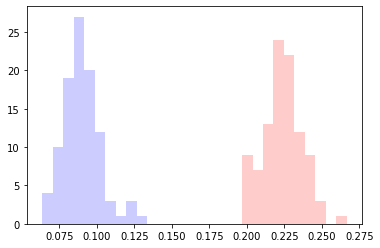

In [9]:
plt.hist(times1, color='r', alpha=0.2)
plt.hist(times2, color='b', alpha=0.2)

plt.show()